## 합성곱/풀링 계층 구현하기

4차원 배열

In [1]:
import numpy as np

In [3]:
x = np.random.rand(10, 1, 28, 28) # 데이터 수, 채널, 높이, 너비
print(x.shape) 
print(x.shape[0])
print(x.shape[1])

(10, 1, 28, 28)
10
1


im2col로 데이터 전개하기

In [16]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h) // stride + 1
    out_w = (W + 2*pad - filter_w) // stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant') ## height, width에만 padding 추가
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            ## col 배열의 (0, 0) 위치에 해당하는 모든 '윈도우'에 중복되어 저장
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]
    
    ## N, out_h, out_w, C, h, w -> (N * out_h * out_w, C * h * w)
    col = col.transpose(0, 4, 5, 1, 2 ,3).reshape(N * out_h * out_w, -1)
    return col

In [8]:
input_data = np.random.rand(6, 3, 2, 2)
pad = 1
img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')

In [2]:
import numpy as np

# 예시 데이터 설정
N, C, H, W = 1, 1, 4, 4  # 1개의 이미지, 1개의 채널, 4x4 크기
filter_h, filter_w, stride, pad = 2, 2, 2, 0  # 2x2 필터, 스트라이드 2, 패딩 0

# 4x4 크기의 이미지 데이터 생성 (값은 행과 열 인덱스의 합으로 설정)
input_data = np.array([[[[i*4 + j for j in range(W)] for i in range(H)]]])
print("원본 이미지 데이터:")
print(input_data)

# 출력 데이터의 높이와 너비 계산
out_h = (H + 2*pad - filter_h)//stride + 1
out_w = (W + 2*pad - filter_w)//stride + 1

# 패딩 적용 (이 경우에는 패딩이 0이므로 원본 데이터 그대로 사용)
img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')

# 2차원 배열 초기화
col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))
print(col)
# 이미지 데이터의 평탄화
for y in range(filter_h):
    y_max = y + stride*out_h
    for x in range(filter_w):
        x_max = x + stride*out_w
        col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]
        print(f"row: {y}, col: {x}")
        print(col)

print("\n평탄화된 데이터 (col 배열):")
print(col)

# 차원 재배열 및 최종 2차원 배열 생성
col = col.transpose(0, 4, 5, 1, 2, 3)
print("\ntranspose 배열 (col 배열):")
print(col)

col = col.reshape(N*out_h*out_w, -1)

print("\n최종 2차원 배열 (col 배열):")
print(col)


원본 이미지 데이터:
[[[[ 0  1  2  3]
   [ 4  5  6  7]
   [ 8  9 10 11]
   [12 13 14 15]]]]
[[[[[[0. 0.]
     [0. 0.]]

    [[0. 0.]
     [0. 0.]]]


   [[[0. 0.]
     [0. 0.]]

    [[0. 0.]
     [0. 0.]]]]]]
row: 0, col: 0
[[[[[[ 0.  2.]
     [ 8. 10.]]

    [[ 0.  0.]
     [ 0.  0.]]]


   [[[ 0.  0.]
     [ 0.  0.]]

    [[ 0.  0.]
     [ 0.  0.]]]]]]
row: 0, col: 1
[[[[[[ 0.  2.]
     [ 8. 10.]]

    [[ 1.  3.]
     [ 9. 11.]]]


   [[[ 0.  0.]
     [ 0.  0.]]

    [[ 0.  0.]
     [ 0.  0.]]]]]]
row: 1, col: 0
[[[[[[ 0.  2.]
     [ 8. 10.]]

    [[ 1.  3.]
     [ 9. 11.]]]


   [[[ 4.  6.]
     [12. 14.]]

    [[ 0.  0.]
     [ 0.  0.]]]]]]
row: 1, col: 1
[[[[[[ 0.  2.]
     [ 8. 10.]]

    [[ 1.  3.]
     [ 9. 11.]]]


   [[[ 4.  6.]
     [12. 14.]]

    [[ 5.  7.]
     [13. 15.]]]]]]

평탄화된 데이터 (col 배열):
[[[[[[ 0.  2.]
     [ 8. 10.]]

    [[ 1.  3.]
     [ 9. 11.]]]


   [[[ 4.  6.]
     [12. 14.]]

    [[ 5.  7.]
     [13. 15.]]]]]]

transpose 배열 (col 배열):
[[[[[[ 0.  1.]
     [ 4.  5.]]]

col2im

In [ ]:
def col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
    N, C, W, H = input_shape
    out_h = (H + 2*pad - filter_h) // stride + 1
    out_w = (W + 2*pad - filter_w) // stride + 1
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2)

    img = np.zeros((N, C, H + 2*pad + stride - 1, W + 2*pad + stride - 1))
    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x +stride * out_w
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

    return img[:, :, pad:pad+H, pad:pad+W]

In [4]:
import numpy as np

# 입력 데이터 설정
N, C, H, W = 1, 1, 4, 4  # 1개의 이미지, 1개의 채널, 4x4 크기
filter_h, filter_w, stride, pad = 2, 2, 2, 0  # 2x2 필터, 스트라이드 2, 패딩 0

# im2col로 변환된 데이터 (예시)
col = np.array([[[[ 0,  1], [ 4,  5]],
                 [[ 2,  3], [ 6,  7]]],
                [[[ 8,  9], [12, 13]],
                 [[10, 11], [14, 15]]]])

# 출력 데이터의 높이와 너비 계산
out_h = (H + 2*pad - filter_h) // stride + 1
out_w = (W + 2*pad - filter_w) // stride + 1

# 평탄화된 데이터의 차원 재배열
col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2)
print("Transpose 후의 col 배열:")
print(col)

# 초기 이미지 배열 생성
img = np.zeros((N, C, H + 2*pad + stride - 1, W + 2*pad + stride - 1))
print("초기 이미지 배열:")
print(img)

# col에서 이미지로 데이터 복원
for y in range(filter_h):
    y_max = y + stride * out_h
    for x in range(filter_w):
        x_max = x + stride * out_w
        ## 각 필터를 통해 획득된 값을 누적하여 이미지를 복원. 중복되는 픽셀이 존재하는 경우 반드시 += 연산자를 사용해야 함
        img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]
        print(f"y: {y}, x: {x}, img 배열 업데이트 후:")
        print(img)

# 최종 이미지 추출
img = img[:, :, pad:pad+H, pad:pad+W]
print("최종 이미지:")
print(img)

Transpose 후의 col 배열:
[[[[[[ 0  2]
     [ 8 10]]

    [[ 1  3]
     [ 9 11]]]


   [[[ 4  6]
     [12 14]]

    [[ 5  7]
     [13 15]]]]]]
초기 이미지 배열:
[[[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]]]
y: 0, x: 0, img 배열 업데이트 후:
[[[[ 0.  0.  2.  0.  0.]
   [ 0.  0.  0.  0.  0.]
   [ 8.  0. 10.  0.  0.]
   [ 0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.]]]]
y: 0, x: 1, img 배열 업데이트 후:
[[[[ 0.  1.  2.  3.  0.]
   [ 0.  0.  0.  0.  0.]
   [ 8.  9. 10. 11.  0.]
   [ 0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.]]]]
y: 1, x: 0, img 배열 업데이트 후:
[[[[ 0.  1.  2.  3.  0.]
   [ 4.  0.  6.  0.  0.]
   [ 8.  9. 10. 11.  0.]
   [12.  0. 14.  0.  0.]
   [ 0.  0.  0.  0.  0.]]]]
y: 1, x: 1, img 배열 업데이트 후:
[[[[ 0.  1.  2.  3.  0.]
   [ 4.  5.  6.  7.  0.]
   [ 8.  9. 10. 11.  0.]
   [12. 13. 14. 15.  0.]
   [ 0.  0.  0.  0.  0.]]]]
최종 이미지:
[[[[ 0.  1.  2.  3.]
   [ 4.  5.  6.  7.]
   [ 8.  9. 10. 11.]
   [12. 13. 14. 15.]]]]


합성곱 계층 구현하기

In [17]:
x1 = np.random.rand(1, 3, 7, 7) # 데이터, 채널, 높이, 너비
col1 = im2col(x1, 5, 5, stride=1, pad=0)
print(col1.shape) ## filter_h * filter_w * channel 수만큼의 feature 생성

x2 = np.random.rand(10, 3, 7, 7)
col2 = im2col(x2, 5, 5, stride=1, pad=0)
print(col2.shape)

(9, 75)
(90, 75)


In [84]:
class Convolution: 
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad

        self.x = None
        self.col = None
        self.col_W = None

        self.dW = None
        self.db = None
    
    def forward(self, x):
        FN, C, FH, FW = self.W.shape # 필터 개수, 채널, 높이, 너비
        N, C, H, W = x.shape
        out_h = int((H + 2*self.pad - FH) / self.stride + 1)
        out_w = int((W + 2*self.pad - FW) / self.stride + 1)

        col = im2col(x, FH, FW, self.stride, self.pad) ## (N * H * W, C * FH * FW)
        col_W = self.W.reshape(FN, -1).T # 필터 펼치기 ## (FN, C * FH * FW).T -> (C * FH * FW, FN)
        
        out = np.dot(col, col_W) + self.b ## (C * FH * FW, FN)

        ## (FN, FH, FW, C) -> (FN, C, FH, FW)
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        self.x = x
        self.col = col
        self.col_W = col_W

        return out
    
    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0,2,3,1).reshape(-1, FN)

        self.db = np.sum(dout, axis=0)
        self.dW = np.dot(self.col.T, dout)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)

        dcol = np.dot(dout, self.col_W.T)
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)

        return dx


In [35]:
## 예시 입력 데이터, 필터 가중치, 편향 설정
x = np.random.rand(1, 1, 4, 4) # 임의의 4x4 크기의 이미지 데이터
weights = np.random.rand(1, 1, 3, 3) # 3x3 크기의 필터
b = np.random.rand(1) # 편향
stride = 1
pad = 0
# Convolution의 forward 함수 대신 독립된 함수로 변환

FN, C, FH, FW = weights.shape # 필터 개수, 채널 수, 필터 높이, 필터 너비 -> 1, 1, 3, 3
N, C, H, W = x.shape # 이미지 수, 채널 수, 높이, 너비 -> 1, 1, 4, 4
out_h = int((H + 2*pad - FH) / stride + 1) # 출력 데이터의 높이 -> 2
out_w = int((W + 2*pad - FW) / stride + 1) # 출력 데이터의 너비 -> 2

# im2col 함수를 사용하여 입력 데이터를 2차원 배열로 변환
col = im2col(x, FH, FW, stride, pad) # (4, 9) = (이미지 수 * 출력 높이 * 출력 너비, 필터 높이 * 필터 너비 * 채널 수)
# 필터를 2차원 배열로 변환
col_weights = weights.reshape(-1, FN)
# col_weights = weights.reshape(FN, -1).T # (1, 9).T = (FN, C * FH * FH).T = (필터 개수, 채널 수 * 필터 높이 * 필터 너비).T

# 컨볼루션 연산 수행: (4, 9) * (9, 1) = (4, 1) = (이미지 수 * 출력 높이 * 출력 너비, 필터 개수)
out = np.dot(col, col_weights) + b
print(out.shape)

# 출력 데이터를 적절한 형태로 재배열
out = out.reshape(N, out_h, out_w, -1) # (이미지 수, 출력 높이, 출력 너비, 필터 개수)

out = out.transpose(0, 3, 1, 2) # (이미지 수, 필터 개수, 출력 높이, 출력 너비)

print("입력 데이터 x:")
print(x)
print("\n필터 가중치 W:")
print(weights)
print("\n편향 b:")
print(b)
print("\n컨볼루션 결과 out:")
print(out)

(4, 1)
입력 데이터 x:
[[[[0.15095727 0.82056136 0.11493924 0.75676101]
   [0.94081566 0.34925049 0.94565707 0.20490969]
   [0.90130254 0.21916467 0.92908738 0.18050672]
   [0.00481105 0.26711582 0.35202711 0.17179169]]]]

필터 가중치 W:
[[[[0.77842886 0.58721771 0.20868072]
   [0.10710841 0.34030623 0.3961517 ]
   [0.51695162 0.39108652 0.97186053]]]]

편향 b:
[0.46235792]

컨볼루션 결과 out:
[[[[3.13453175 2.41899677]
   [2.58539591 2.18616509]]]]


풀링 계층 구현하기

In [74]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad

        self.x = None
        self.arg_max = None
    
    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)

        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad) ## (이미지 수 * 출력 높이 * 출력 너비, 채널 수 * 필터 높이 * 필터 너비)
        col = col.reshape(-1, self.pool_h * self.pool_w) ## (나머지, 필터 높이 * 필터 너비) => 필터 영역이 각 행을 이룰 수 있도록 하여 행의 최댓값을 추출

        arg_max = np.argmax(col, axis=1)
        out = np.max(col, axis=1) ## 각 행의 최댓값을 구해야하므로 axis=1이 됨. 여기서는 (필터 높이 * 필터 너비), 필터 영역의 최댓값을 구하게 됨

        ## 필터 사이즈 * 필터 개수만큼 pooling 결과가 늘어지므로 reshape을 진행 -> 이후 transpose를 통해 (N, C, out_h, out_w) 모양을 맞춰줌
        out = out.reshape(N, out_h, out_w, C).transpose(0,3,1,2)

        self.x = x
        self.arg_max = arg_max
        
        return out
    
    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1)
        
        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size))
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        dmax = dmax.reshape(dout.shape + (pool_size,)) 
        
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)
        
        return dx

## CNN 구현하기

In [ ]:
## 실험 포인트!

In [28]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b

        self.x = None
        self.original_x_shape = None
        self.dW = None
        self.db = None

    def forward(self, x):
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(x, self.W) + self.b

        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)

        dx = dx.reshape(*self.original_x_shape)
        return dx


In [29]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        return out
    
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx

In [75]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T
    
    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

In [76]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    if t.size == y.size:
        t = t.argmax(axis=1)
    batch_size = y.shape[0]
    
    return - np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [77]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)

        return self.loss
    
    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # 정답이 원-핫 인코딩인 경우
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        
        return dx

In [88]:
from collections import OrderedDict
import pickle

class SimpleConvNet:
    def __init__(self, input_dim=(1, 28, 28), 
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1}, 
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1] ## height & width 가 같은 값일 것이라고 가정한 듯함
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2)) ## 2x2 pooling filter

        self.params = {}
        ## 첫 번째 입력 x는 (이미지 수, 채널 수, 높이, 너비) = (N, C, H, W). 이것과 convolution 할 W -> (FN, C, FH, FW)
        self.params['W1'] = weight_init_std * np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        ## bias는 그냥 더해주면 됨
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'], conv_param['stride'], conv_param['pad'])
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])

        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
    
    def loss(self, x, t):
        y = self.predict(x)
        return self.last_layer.forward(y, t)
    
    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1:
            t = np.argmax(t, axis=1)
        
        acc = 0.0

        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt)

        return acc / x.shape[0]
    
    def gradient(self, x, t):
        self.loss(x, t)

        dout = 1
        dout = self.last_layer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        grads = {}
        grads['W1'] = self.layers['Conv1'].dW
        grads['b1'] = self.layers['Conv1'].db
        grads['W2'] = self.layers['Affine1'].dW
        grads['b2'] = self.layers['Affine1'].db
        grads['W3'] = self.layers['Affine2'].dW
        grads['b3'] = self.layers['Affine2'].db

        return grads
    
    def save_params(self, file_name='params.pkl'):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name='params.pkl'):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val
        
        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

학습 코드

In [89]:
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.trainer import Trainer

In [90]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h) // stride + 1
    out_w = (W + 2*pad - filter_w) // stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad,pad), (pad,pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            col[:,:,y,x,:,:] = img[:,:,y:y_max:stride,x:x_max:stride]
    
    ## (이미지 수, 출력 높이, 출력 너비, 필터 수, 필터 높이, 필터 너비) => 필터에 찍힐 대상이 열벡터를 이루게 됨
    col = col.transpose(0,4,5,1,2,3).reshape(N*out_h*out_w, -1)
    return col


In [91]:
def col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
    """(im2col과 반대) 2차원 배열을 입력받아 다수의 이미지 묶음으로 변환한다.
    
    Parameters
    ----------
    col : 2차원 배열(입력 데이터)
    input_shape : 원래 이미지 데이터의 형상（예：(10, 1, 28, 28)）
    filter_h : 필터의 높이
    filter_w : 필터의 너비
    stride : 스트라이드
    pad : 패딩
    
    Returns
    -------
    img : 변환된 이미지들
    """
    N, C, H, W = input_shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2)

    img = np.zeros((N, C, H + 2*pad + stride - 1, W + 2*pad + stride - 1))
    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

    return img[:, :, pad:H + pad, pad:W + pad]

train loss:2.299470088318002
=== epoch:1, train acc:0.261, test acc:0.301 ===
train loss:2.2968717810557426
train loss:2.2911460335199596
train loss:2.286943628019342
train loss:2.270870787721301
train loss:2.263628511727829
train loss:2.2587571900330605
train loss:2.227721476548093
train loss:2.2054915245988234
train loss:2.167175432320232
train loss:2.1312321835158134
train loss:2.0766776790048187
train loss:2.0238304241137413
train loss:1.9985354043848154
train loss:1.948628439023496
train loss:1.9025588852130861
train loss:1.723575320533841
train loss:1.7243269030134993
train loss:1.7294891286194807
train loss:1.54955609053461
train loss:1.4571246387644823
train loss:1.325213718968883
train loss:1.2943489066537006
train loss:1.3238180613912696
train loss:1.0209838794589297
train loss:1.0062980819559
train loss:1.035069038836398
train loss:0.9347359702212544
train loss:0.9537026064183861
train loss:0.9297879451079092
train loss:0.7621558309138307
train loss:0.7929923069507242
train 

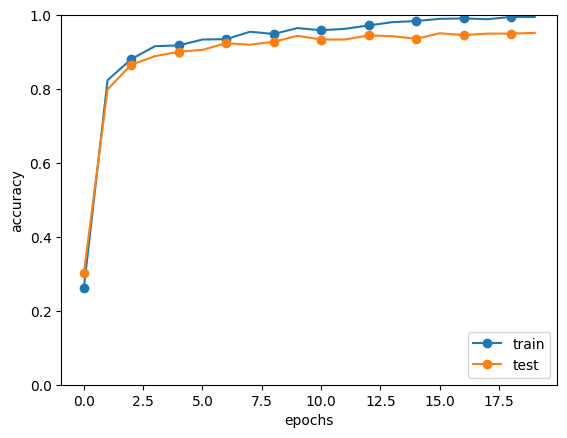

In [92]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20
network = SimpleConvNet(input_dim=(1,28,28),
                        conv_param = {'filter_num': 30, 'filter_size':5, 'pad':0, 'stride':1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr':0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

network.save_params("params.pkl")
print("Saved Network Parameters!")

markers = {'train': 'o', 'test':'s'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='o', label='test', markevery=2)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()